In [1]:
import pandas as pd
data = pd.read_csv('./data/bike_buyers_clean.csv')

In [2]:
def transform_to_embeddings(df:pd.DataFrame, model:object) -> pd.DataFrame:
    """This function takes a dataframe and creates a new dataframe with emeddings

    Args:
        df (pd.DataFrame): The dataframe with input data
        model (object): A model from huggingface to encode data

    Returns:
        df_embedding (pd.DataFrame): df with encoded data
    """
    sentences = []
    for _, row in df.iloc[:, 1:].iterrows():
        sent = []
        for col in data.columns[1:]:
            row_as_sent = f"{col} : {row[col]}"
            sent.append(row_as_sent)
        sentences.append(' '.join(sent))
    
    
    output = model.encode(sentences=sentences, show_progress_bar= True, normalize_embeddings  = True)
    df_embedding = pd.DataFrame(output)

    return df_embedding

In [3]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer(r'sentence-transformers/paraphrase-MiniLM-L6-v2')

embedded_data = transform_to_embeddings(data, model)
embedded_data

/Users/alexander/Desktop/projects/data_analytics/.data_analytics/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches: 100%|██████████| 32/32 [00:05<00:00,  5.34it/s]


,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.107727,0.063922,0.031079,0.010676,-0.107372,0.040726,-0.083571,-0.014081,0.023251,-0.008321,...,0.012499,0.015709,0.039068,-0.026412,0.004565,0.051941,0.024749,-0.003689,0.001880,0.037884
1,0.109942,0.072887,0.027836,-0.009481,-0.101941,0.059382,-0.068517,-0.027886,0.021916,0.001546,...,0.008534,-0.005906,0.026760,0.000153,-0.010188,0.019077,0.060679,-0.008943,0.019504,0.060559
2,0.107427,0.071938,0.032095,0.008017,-0.094774,0.069189,-0.066777,-0.011380,0.029862,-0.016537,...,0.012054,0.010385,0.016245,0.002344,-0.020482,0.013983,0.023065,-0.002451,-0.039269,0.077119
3,0.123986,0.026607,0.071555,-0.005535,-0.098548,0.016914,-0.034691,-0.027554,0.012128,-0.002602,...,0.005090,0.014879,0.033102,-0.000893,-0.020517,0.046419,0.065295,-0.021648,-0.017627,0.071326
4,0.103975,0.077699,0.023022,-0.009165,-0.097189,0.036396,-0.059463,-0.026743,-0.001402,-0.010888,...,0.015953,0.016327,0.029028,-0.004198,-0.011077,0.038546,0.048616,-0.012810,0.017161,0.059725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.119101,0.047393,0.044970,-0.006774,-0.107504,0.042471,-0.063836,-0.027313,0.009400,0.006598,...,0.007872,-0.023359,0.022045,-0.018244,0.001118,0.023280,0.062035,-0.019401,-0.039752,0.053392
996,0.126782,0.040848,0.056221,-0.002340,-0.092872,0.028053,-0.053478,-0.032825,-0.016689,-0.016588,...,0.021662,-0.006111,0.022519,-0.009647,-0.017195,0.028417,0.054668,-0.021042,-0.011698,0.064990
997,0.109906,0.040050,0.055661,0.000295,-0.115944,0.028266,-0.067927,-0.030185,-0.003550,0.007788,...,0.018727,-0.024775,0.025902,-0.025744,0.008841,0.031218,0.051713,-0.007697,-0.017213,0.035005
998,0.113973,0.032887,0.052064,-0.009990,-0.082439,0.039094,-0.027722,-0.043041,-0.010759,-0.001518,...,0.017997,0.006720,0.024628,-0.010653,-0.001511,0.028950,0.058737,-0.019070,-0.035762,0.070102


In [4]:
from pyod.models.ecod import ECOD
clf = ECOD()
outliers = clf.fit_predict(embedded_data)

/Users/alexander/Desktop/projects/data_analytics/.data_analytics/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [5]:
embedded_data['outliers'] = outliers
embedded_data_no_outliers = embedded_data[embedded_data['outliers']==0].drop(columns=['outliers'])
embedded_data_no_outliers.shape

(900, 384)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/alexander/Desktop/projects/data_analytics/.data_analytics/lib/python3.9/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


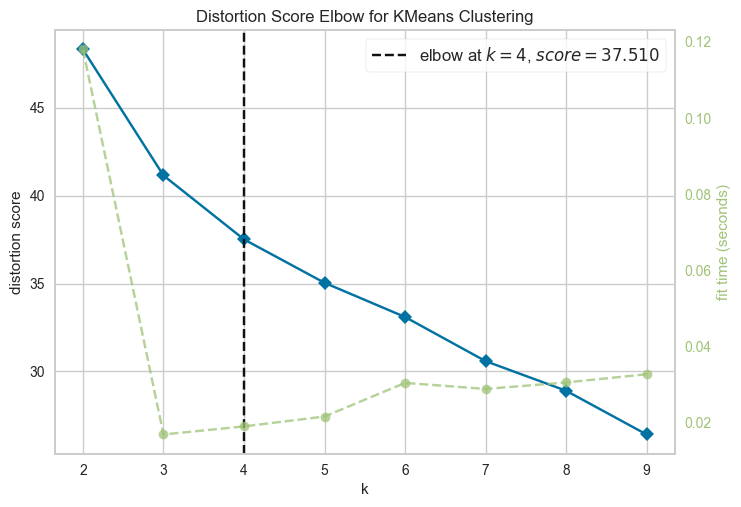

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(embedded_data_no_outliers)
visualizer.show()

In [7]:
km = KMeans(n_clusters=6, init='k-means++', random_state=42, n_init = 10, max_iter=10000)
clusters = km.fit_predict(embedded_data_no_outliers)

In [8]:
len(clusters)

900

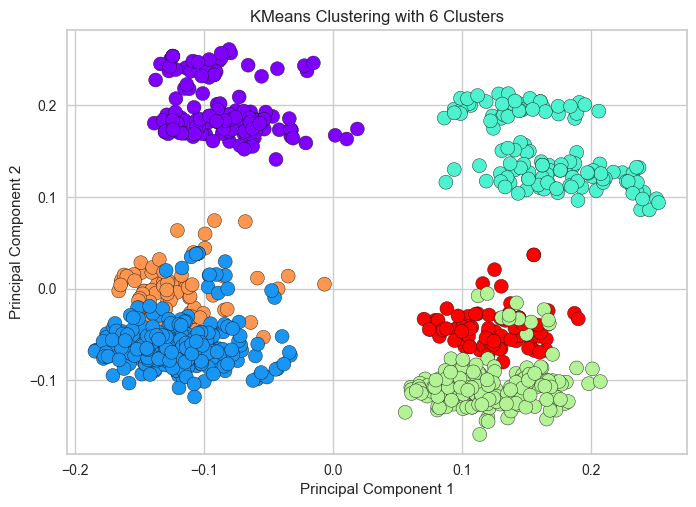

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce data to 2D
pca = PCA(n_components=2)
data_pca = pca.fit_transform(embedded_data_no_outliers)

# Plot
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='rainbow', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with 6 Clusters')
plt.show()

Text(0.5, 0, 'Principal Component 3')

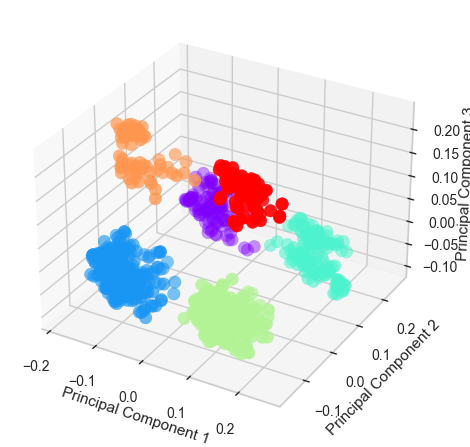

In [10]:
# Reduce data to 3D
pca = PCA(n_components=3)
data_pca = pca.fit_transform(embedded_data_no_outliers)

# 3D-Plot
graph = plt.figure()
axis = graph.add_subplot(projection="3d")
xdata = data_pca[:, 0]
ydata = data_pca[:, 1]
zdata = data_pca[:, 2]
axis.scatter3D(xdata, ydata, zdata, c=clusters, cmap = "rainbow", s=80)
axis.set_xlabel("Principal Component 1")
axis.set_ylabel("Principal Component 2")
axis.set_zlabel("Principal Component 3")

In [11]:
data['outliers'] = outliers
data = data[data['outliers']==0]
data['clusters'] = clusters

In [12]:
data.groupby('clusters').agg({
    'Gender':pd.Series.mode,
    'Marital Status':pd.Series.mode,
    'Income':pd.Series.mode, 
    'Children':pd.Series.mode,
    'Education':pd.Series.mode,
    'Occupation':pd.Series.mode,
    'Home Owner':pd.Series.mode,
    'Cars':pd.Series.mode,
    'Commute Distance':pd.Series.mode,
    'Region':pd.Series.mode,	
    'Age':pd.Series.mode,	
    'Purchased Bike':pd.Series.mode
    })

,Gender,Marital Status,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
clusters,,,,,,,,,,,,
0,Female,Married,40000,1,Bachelors,Clerical,Yes,0,0-1 Miles,Europe,43,No
1,Male,Married,60000,2,Partial College,Professional,Yes,2,0-1 Miles,North America,48,No
2,Female,Single,30000,0,Partial College,Manual,Yes,0,0-1 Miles,Europe,"[35, 36]",Yes
3,Female,Single,60000,0,Bachelors,Skilled Manual,Yes,2,"[1-2 Miles, 5-10 Miles]",North America,38,Yes
4,Male,Married,80000,2,Bachelors,Skilled Manual,Yes,2,5-10 Miles,Pacific,"[40, 46]",Yes
5,Female,Single,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,"[36, 38, 41]",Yes
